# 04 - Supervised Learning Model Comparison


In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the dataset after feature selection
df = pd.read_csv("/content/Cleaned_dataset_AfterFeatureSelection.csv")
X = df.drop("target", axis=1)
y = df["target"]


In [3]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)


In [4]:
# Initialize multiple classification models
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "SVM": svm.SVC(kernel='linear'),
    "KNN": KNeighborsClassifier(n_neighbors=7),
    "Decision Tree": DecisionTreeClassifier(random_state=0),
    "Random Forest": RandomForestClassifier(random_state=0),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}


In [5]:
# Train and evaluate each model, then store accuracy scores
scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = round(accuracy_score(y_test, y_pred) * 100, 2)
    scores[name] = acc
    print(f"{name} Accuracy: {acc}%")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 85.25%
Naive Bayes Accuracy: 90.16%
SVM Accuracy: 86.89%
KNN Accuracy: 62.3%
Decision Tree Accuracy: 78.69%
Random Forest Accuracy: 85.25%
XGBoost Accuracy: 80.33%


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:35:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


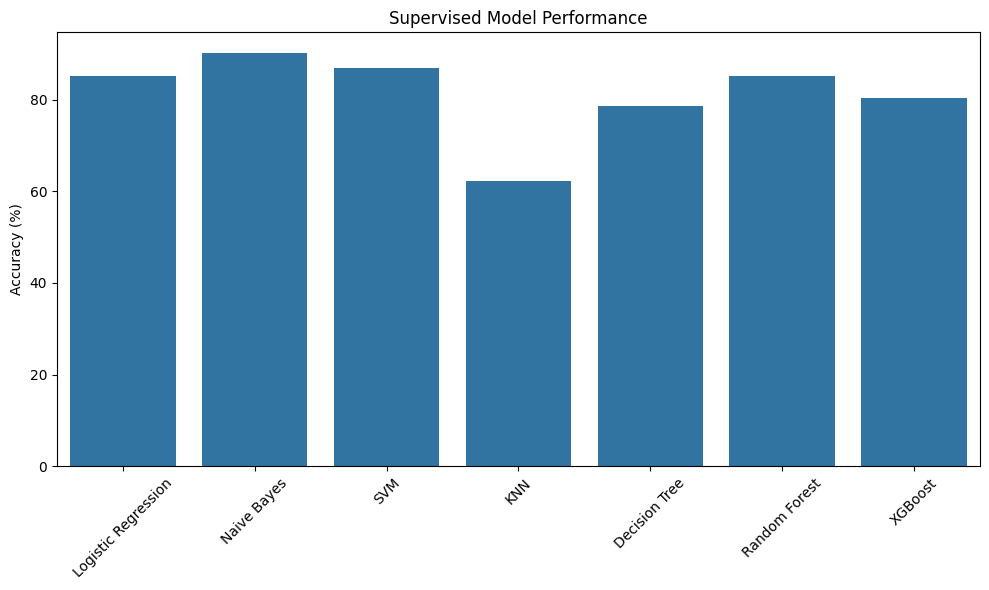

In [6]:
# Visualize model performance using a bar chart
plt.figure(figsize=(10,6))
sns.barplot(x=list(scores.keys()), y=list(scores.values()))
plt.ylabel("Accuracy (%)")
plt.xticks(rotation=45)
plt.title("Supervised Model Performance")
plt.tight_layout()
plt.show()
